In [44]:
!pwd

/home/xuyongning/OneAutoTest/libai/accuracy_verify/libai


In [2]:
import os
os.chdir('./libai')

In [3]:
import os
txt_list = sorted(os.listdir("./loss_txt"))
print(txt_list)

['LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb128_1n1g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb128_1n1g_loss_master.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb512_1n4g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb512_1n4g_loss_master.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp2_mb32_gb256_1n4g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp2_mb32_gb256_1n4g_loss_master.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp1_mb32_gb256_1n4g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp1_mb32_gb256_1n4g_loss_master.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb64_gb256_1n4g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb64_gb256_1n4g_loss_master.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb64_gb512_1n8g_loss_3d5e919.txt', 'LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb64_gb512_1n8g_los

In [4]:
!pip install matplotlib

for i in range(0, len(txt_list), 2):
    file_name1 = txt_list[i].split('.')[-2]
    commit1 = file_name1.split('_')[-1]
    
    file_name2 = txt_list[i+1].split('.')[-2]
    commit2 = file_name2.split('_')[-1]
    
    # make commit2=='master'
    if commit1 == "master":
        file_tmp = file_name1
        commit_tmp = commit1
        file_name1 = file_name2
        commit1 = commit2
        file_name2 = file_tmp
        commit2 = commit_tmp
    
    !echo $file_name1 $file_name2 $commit1 $commit2
    

    !sed -i "s#loss1.txt#loss_txt/{file_name1}.txt#g" draw_loss.py
    !sed -i "s#loss1#{file_name1}#g" draw_loss.py
    
    !sed -i "s#loss2.txt#loss_txt/{file_name2}.txt#g" draw_loss.py
    !sed -i "s#loss2#{file_name2}#g" draw_loss.py
    
    !sed -i "s#loss_curve.png#curve/loss_curve_{file_name1}.png#g" draw_loss.py
    !python3 draw_loss.py
    !sed -i "s#curve/loss_curve_{file_name1}.png#loss_curve.png#g" draw_loss.py
    
    !sed -i "s#loss_txt/{file_name1}.txt#loss1.txt#g" draw_loss.py
    !sed -i "s#{file_name1}#loss1#g" draw_loss.py
    
    !sed -i "s#loss_txt/{file_name2}.txt#loss2.txt#g" draw_loss.py
    !sed -i "s#{file_name2}#loss2#g" draw_loss.py

LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb128_1n1g_loss_3d5e919 LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb128_1n1g_loss_master 3d5e919 master
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb512_1n4g_loss_3d5e919 LibAI_bert_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb32_gb512_1n4g_loss_master 3d5e919 master
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not foun

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [62]:
!pip install pyyaml

import os
os.chdir('/home/xuyongning/OneAutoTest/libai/accuracy_verify')
!python3 extract_libai_libai.py --compare-log ./libai/test_logs_loss/master/ --test-log ./libai/test_logs_loss/3d5e919/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
------------------------ arguments ------------------------
  compare_log ..................................... ./libai/test_logs_loss/master/
  oneflow_commit .................................. None
  test_log ........................................ ./libai/test_logs_loss/3d5e919/
-------------------- end of arguments ---------------------


In [40]:
# import os
# os.chdir('./libai')
# !mkdir img_bert img_gpt img_t5
# !cd curve && cp loss_curve_LibAI_bert* ../img_bert/ && cp loss_curve_LibAI_gpt2* ../img_gpt/ && cp loss_curve_LibAI_t5* ../img_t5/

import os
os.chdir('/home/xuyongning/OneAutoTest/libai/accuracy_verify/libai')

for title in ['bert', 'gpt', 't5']:
    !echo $title
    !sed -i "s#model#{title}#g" compose.py
    if title == 'gpt':
        !sed -i "s#IMAGE_COLUMN = 3#IMAGE_COLUMN = 2#g" compose.py
    !python3 compose.py
    !sed -i "s#{title}#model#g" compose.py
    !sed -i "s#IMAGE_COLUMN = 2#IMAGE_COLUMN = 3#g" compose.py

bert
['loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp1_mb8_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb4_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb16_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb16_gb128_1n8g_loss_3d5e919.png']
/home/xuyongning/OneAutoTest/libai/accuracy_verify/libai/compose.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  (IMAGE_SIZE_1, IMAGE_SIZE_2), Image.ANTIALIAS)
gpt
['loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp1_mb8_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp1_pp1_mb4_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb16_gb64_1n4g_loss_3d5e919.png', 'loss_curve_LibAI_gpt2_nl24_nah16_hs1024_FP16_actrue_mp2_pp2_mb16_gb128_1n8g_loss_3

In [53]:
#!~/ossutil64 -c ~/ossutilconfig cp -r -f ./curve/ oss://oneflow-test/loss_matching/GradAcc/oneflow-28/jupyter_test/curve/
#!~/ossutil64 -c ~/ossutilconfig cp -r -f ./loss_txt/ oss://oneflow-test/loss_matching/GradAcc/oneflow-28/jupyter_test/loss_txt/

Succeed: Total num: 19, size: 883,205. OK num: 19(upload 19 files).

average speed 5589000(byte/s)

0.158319(s) elapsed
Succeed: Total num: 32, size: 51,059. OK num: 32(upload 32 files).

average speed 275000(byte/s)

0.186068(s) elapsed


In [56]:
import os
os.chdir('/home/xuyongning/OneAutoTest/libai/accuracy_verify/libai')

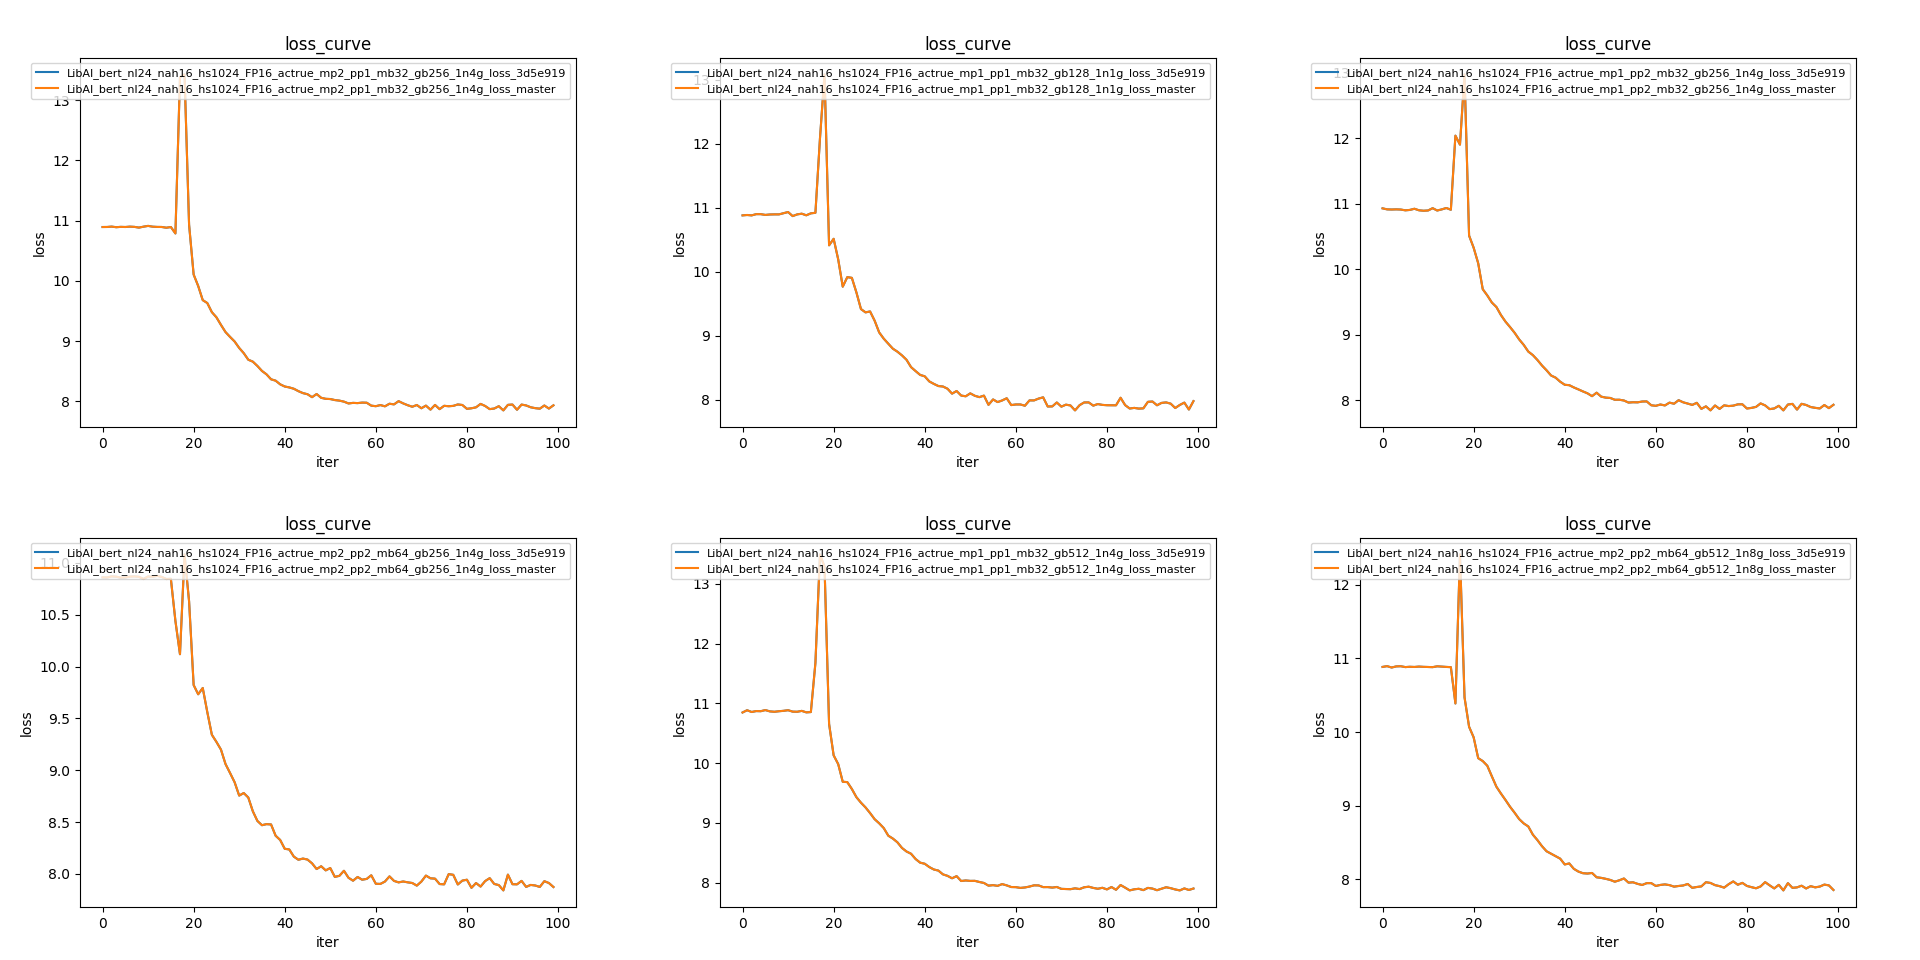

In [58]:
from PIL import Image
from IPython.display import Image as IMG

display(Image.open('./curve/compose_bert.png'))

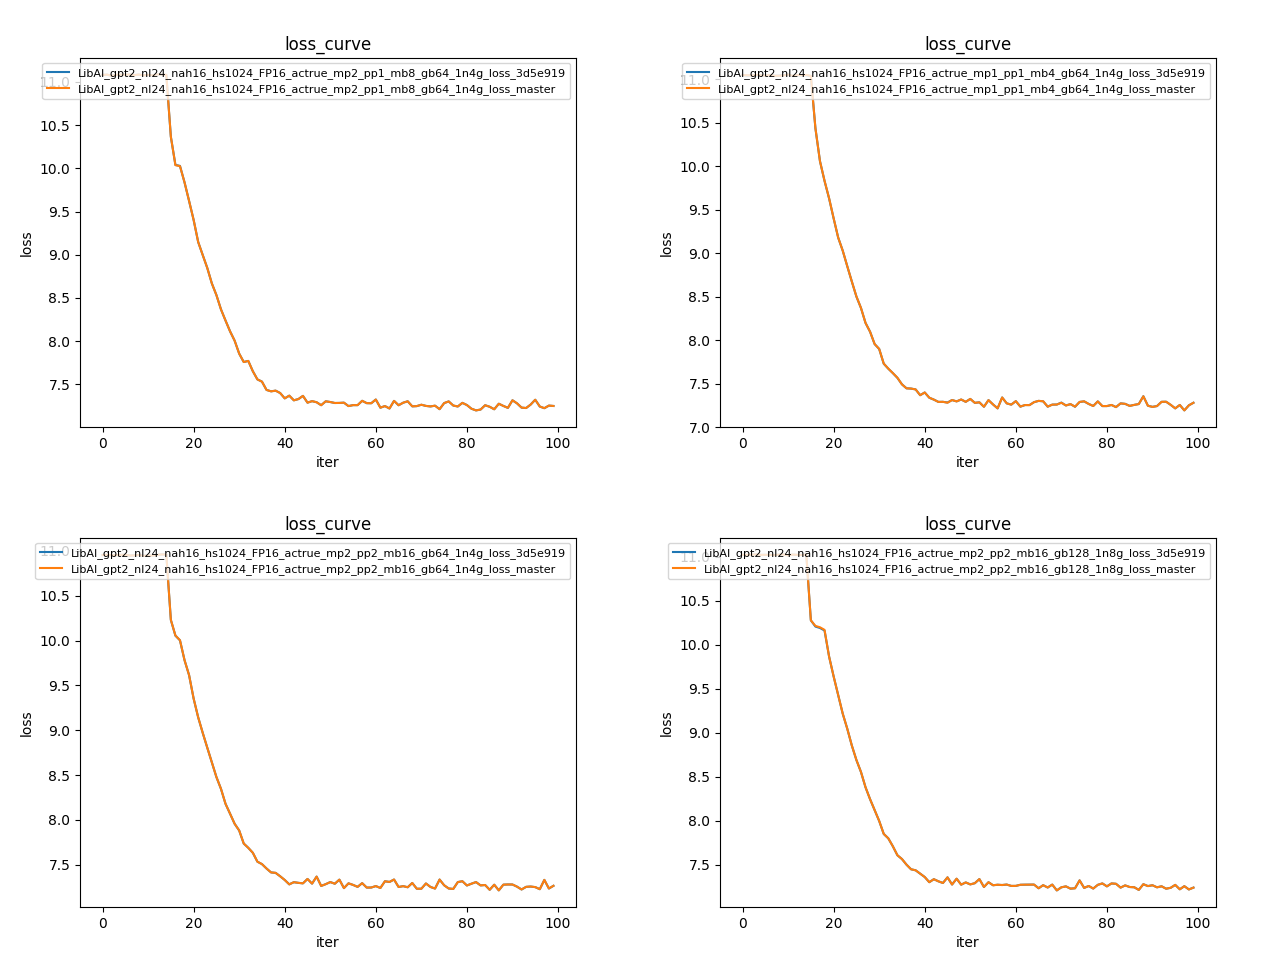

In [59]:
display(Image.open('./curve/compose_gpt.png'))

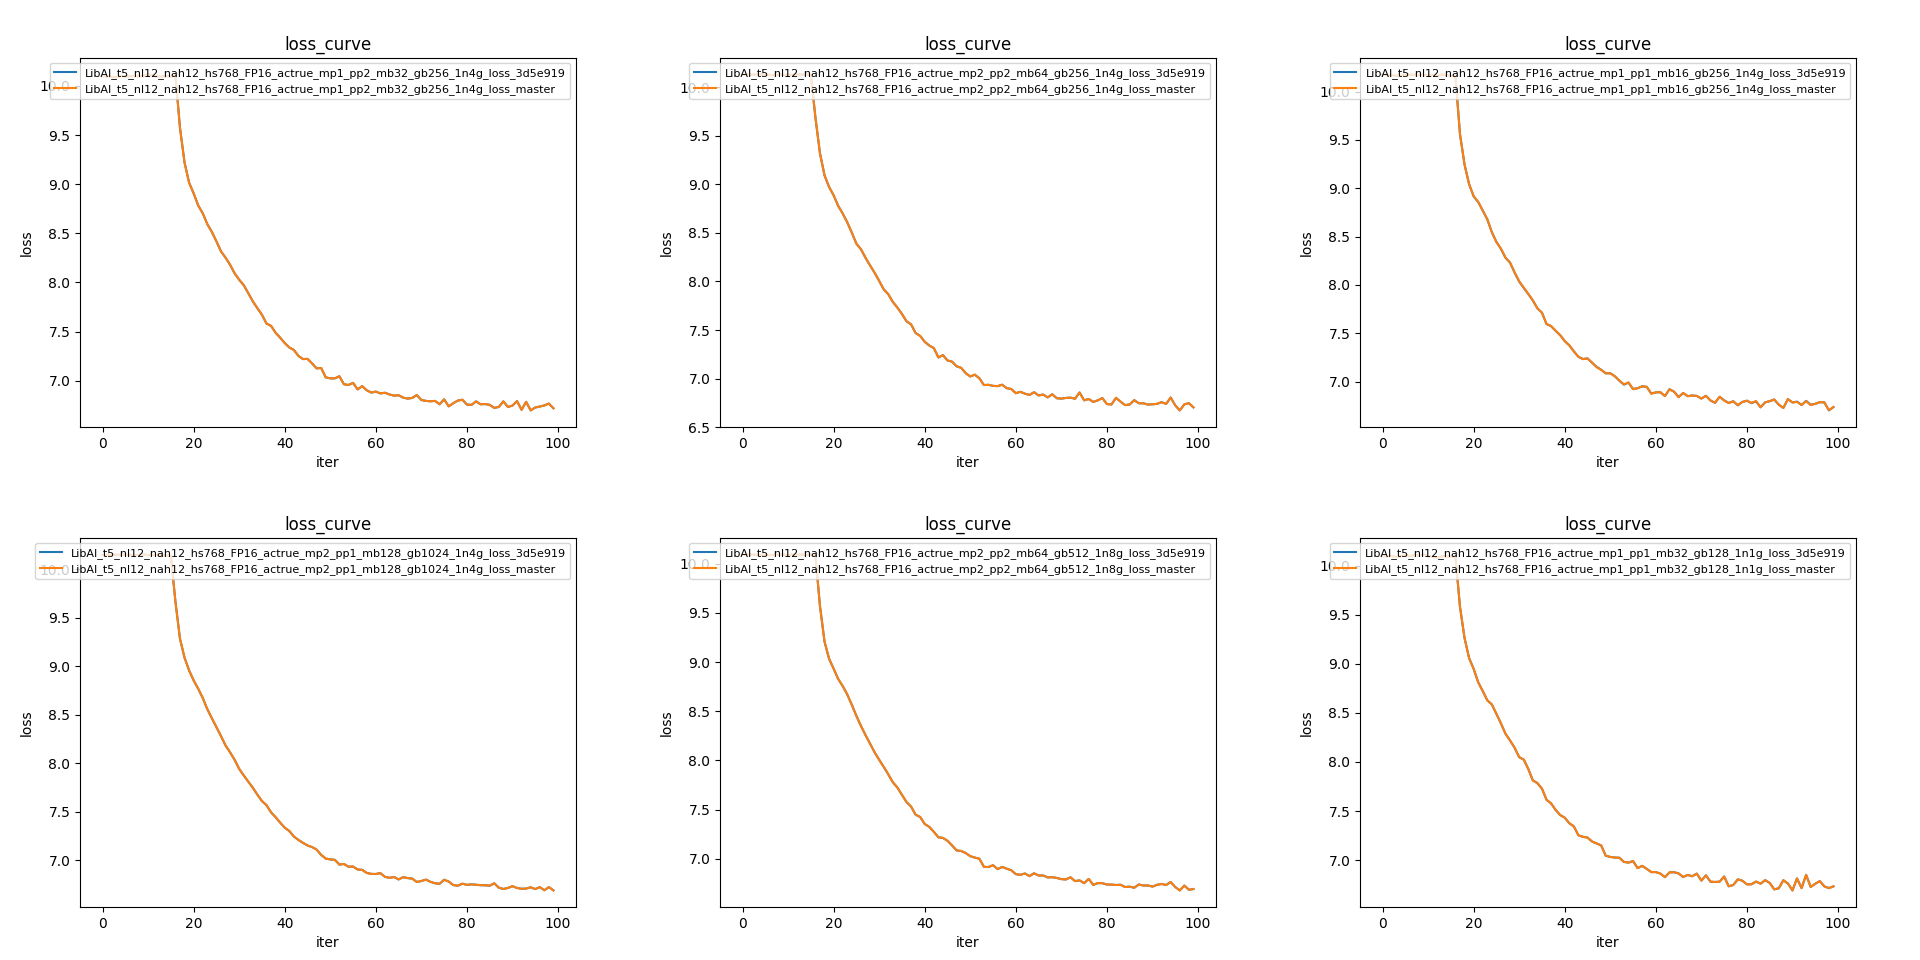

In [60]:
display(Image.open('./curve/compose_t5.png'))